In [421]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [422]:
#import the xyz files and get the atoms in a list
CO2_Ru = pd.read_csv('CO2_Ru.csv', sep=',', header=None)
print(CO2_Ru.values)

[[0.005979288 0.99249146 0.821664669 'Ru']
 [0.33942587 0.99240554 0.82141084 'Ru']
 [0.672688078 0.9924962509999999 0.82170573 'Ru']
 [0.005669844 0.242584883 0.821056225 'Ru']
 [0.339454236 0.24254530800000002 0.8214742970000001 'Ru']
 [0.67263436 0.24246511699999998 0.8217243940000001 'Ru']
 [0.0060477330000000004 0.49245470799999996 0.8215601509999999 'Ru']
 [0.339341589 0.492474495 0.8216945309999999 'Ru']
 [0.672677162 0.492498449 0.821646005 'Ru']
 [0.00605524 0.742499495 0.8216945309999999 'Ru']
 [0.339354032 0.742450547 0.821672135 'Ru']
 [0.67272939 0.74245992 0.821668402 'Ru']
 [0.155695856 0.200304108 0.953644797 'C']
 [0.242287355 0.078011041 0.9530438179999999 'O']
 [0.069166332 0.322507818 0.954249508 'O']]


In [423]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [424]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO2_Ru_angs=np.matmul(CO2_Ru.iloc[:, 0:3],lattice_vectors)
CO2_Ru_angs = np.array(CO2_Ru_angs)
print(CO2_Ru_angs)

[[ 5.55181317  9.52990279 22.0121    ]
 [ 8.32413716  9.52907779 22.00530001]
 [11.09590717  9.5299488  22.01320001]
 [ 1.39197     2.3293     21.99580001]
 [ 4.16736     2.32892    22.007     ]
 [ 6.9375      2.32815    22.01370001]
 [ 2.78032     4.72855    22.0093    ]
 [ 5.55196     4.72874    22.01289999]
 [ 8.32397     4.72897    22.0116    ]
 [ 4.16656     7.12948    22.01289999]
 [ 6.93786     7.12901    22.01230001]
 [ 9.71012     7.1291     22.01220001]
 [ 2.40513001  1.92332    25.54780001]
 [ 2.44723     0.749062   25.5317    ]
 [ 2.36305     3.09672    25.564     ]]


In [425]:
#Ready to start iterating?
vertices = np.array([[ 8.31557575,  0.,          0.        ],
                     [ 5.54371717,  9.60199979,  0.        ],
                     [ 0.,          0.,         26.78963917],
                     [ 0.,          0.,          0.        ],
                     [ 13.85929292, 9.60199979,  0.        ],
                     [ 5.54371717,  9.60199979, 26.78963917],
                     [ 8.31557575,  0.,         26.78963917],
                     [ 13.85929292, 9.60199979, 26.78963917]])
print(vertices)

[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]
 [ 0.          0.          0.        ]
 [13.85929292  9.60199979  0.        ]
 [ 5.54371717  9.60199979 26.78963917]
 [ 8.31557575  0.         26.78963917]
 [13.85929292  9.60199979 26.78963917]]


In [426]:
# Atomic mass of Ru: 101.07
# Atomic mass C: 12.011
# Atomic mass O: 15.999
# Total atomic mass of cluster: 
total_mass = 101.07*12 + 12.011 + 15.999*2

In [427]:
CO2_Ru = np.array(CO2_Ru)
V_ext_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    V_ext = 0
    for j in range(len(CO2_Ru_angs)):
        distance = np.sum(np.power(CO2_Ru_angs[j,:] - vertices[i,:],2))
        element = CO2_Ru[j,3]
        if element == 'Ru':
            charge = 101.07/total_mass
        elif element == 'C':
            charge = 12.011/total_mass
        elif element == 'O':
            charge = 15.999/total_mass
        else:
            charge = 0.0
        V_ext = V_ext + charge/distance
    V_ext_oper[i,i] = V_ext

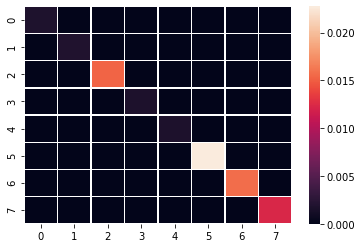

In [428]:
fig = sns.heatmap(V_ext_oper, linewidth=0.5)
plt.savefig('CO2_Ru_V_ext.png',dpi=300)

In [429]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a first derivative.

In [430]:
E_kin_oper = np.zeros((len(vertices),len(vertices)))

for i in range(len(vertices)):
    V_kin = 0
    #Obtain the distance from one vertex to the next.
    if i < len(vertices) - 1: # valid up until the next to last index
        distance = np.sum(np.power(vertices[i+1,:] - vertices[i,:],2))
    elif i == len(vertices) - 1: # At the last index we have to hop around to the start.
        distance = np.sum(np.power(vertices[0,:] - vertices[i,:],2))
    V_kin = 1/(2*distance)
    if i < len(vertices) - 1: # valid up until the next to last index
        E_kin_oper[i,i] = V_kin
        E_kin_oper[i+1,i+1] = -V_kin #putting in the finite difference
    elif i == len(vertices) - 1:
        E_kin_oper[i,i] = V_kin
        E_kin_oper[0,0] = -V_kin
        

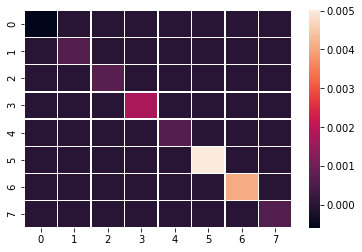

In [431]:
fig = sns.heatmap(E_kin_oper, linewidth=0.5)
plt.savefig('CO2_Ru_E_kin.png',dpi=300)

In [432]:
V_e_e_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    for j in range(len(vertices)):
        if i != j:
            distance = np.sum(np.power(vertices[i,:] - vertices[j,:],2))
            V_e_e_oper[i,j] = 1/distance


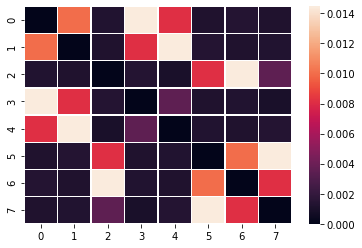

In [433]:
fig = sns.heatmap(V_e_e_oper, linewidth=0.5)
plt.savefig('CO2_Ru_V_e_e.png',dpi=300)

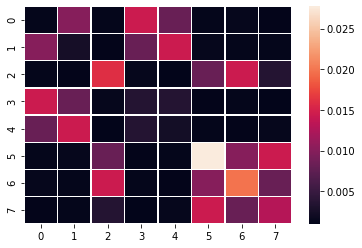

In [434]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper
fig = sns.heatmap(H_oper, linewidth=0.5)
plt.savefig('CO2_Ru_H.png',dpi=300)

In [435]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)


eigenvalues:  [ 0.05135019  0.03075143 -0.01360945 -0.01171056  0.0190936   0.00576944
  0.00301925  0.00149509]


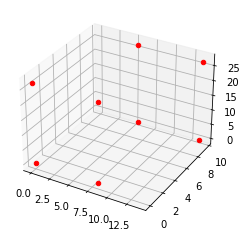

In [436]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting the points
for p in vertices:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')


[-0.01869512 -0.04843617  1.         -0.00390646 -0.05201823 -1.01438035
  0.93923164 -0.59502284]
[-0.01869512 -0.04843617  1.         -0.00390646 -0.05201823 -1.01438035
  0.93923164 -0.59502284]


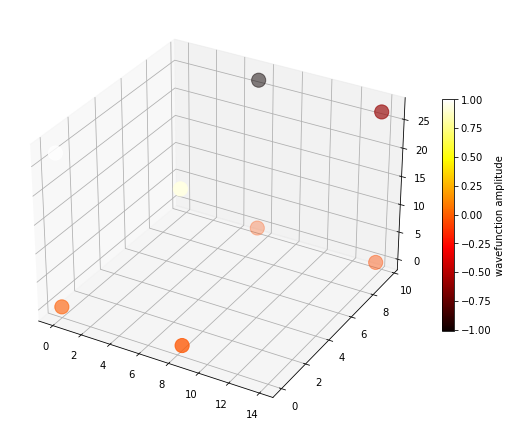

In [437]:

#fig = plt.figure(figsize=(8,6))

#ax = fig.add_subplot(111,projection='3d')
#colmap = cm.ScalarMappable(cmap=cm.hsv)
#colmap.set_array(v[:,4])

#print(v[:,4])
#print(max(v[:,4]))
#colors = cm.hsv(v[:,4]/max(v[:,4]))
#print(colors)

#yg = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=colors, marker='o')
#cb = fig.colorbar(colmap)

# creating figures
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# setting color bar
#color_map = cm.ScalarMappable(cmap=cm.hot)
#color_map.set_array(v[:,4]/max(v[:,4]))
colors = v[:,4]/max(v[:,4])

print(v[:,4]/max(v[:,4]))
print(colors)

# creating the heatmap
map_1 = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c = colors,cmap='hot',s=200)

cbar = plt.colorbar(map_1,fraction=0.026, pad=0.04)
cbar.set_label('wavefunction amplitude')
plt.show()
fig.savefig('CO2_Ru_wavefunc.png',dpi=300)